In [2]:
import torch
from unet import UNet
import diffusion as df
from visualize import visualize_value_map


In [18]:
def visualize_tensor(x):
    x = x.reshape(4, 100).permute(1, 0).detach().numpy()
    visualize_value_map(x, 10)


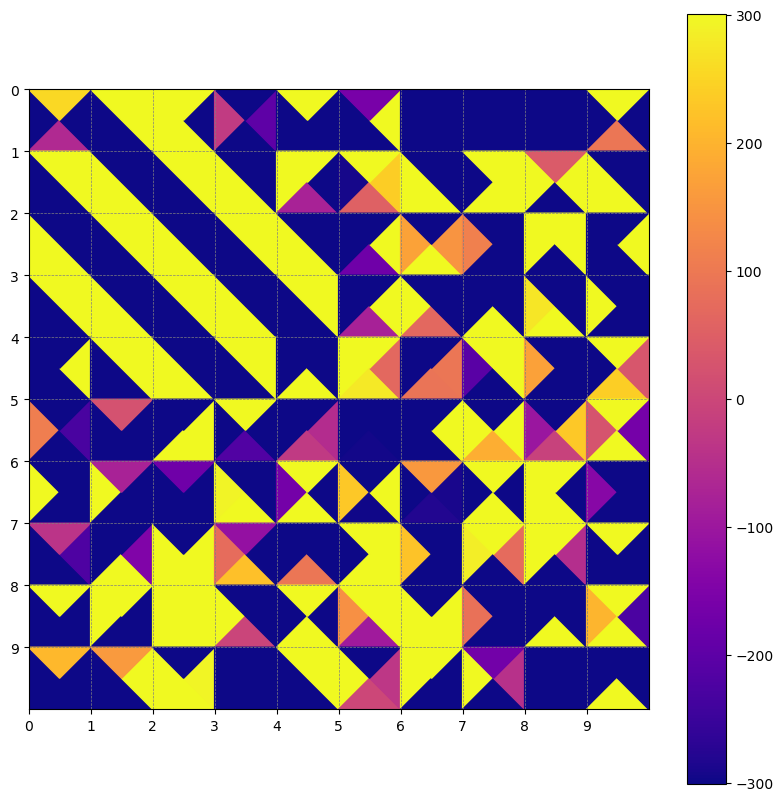

In [19]:
net = UNet()
device = torch.device("cpu")
base = df.DiffusionModel(net, device)

base.load_state_dict(torch.load("./models/model0.pt", weights_only=True))

sampler = df.DiffusionSampler(base, 1000)

x = sampler((1, 4, 10, 10))

visualize_tensor(x)

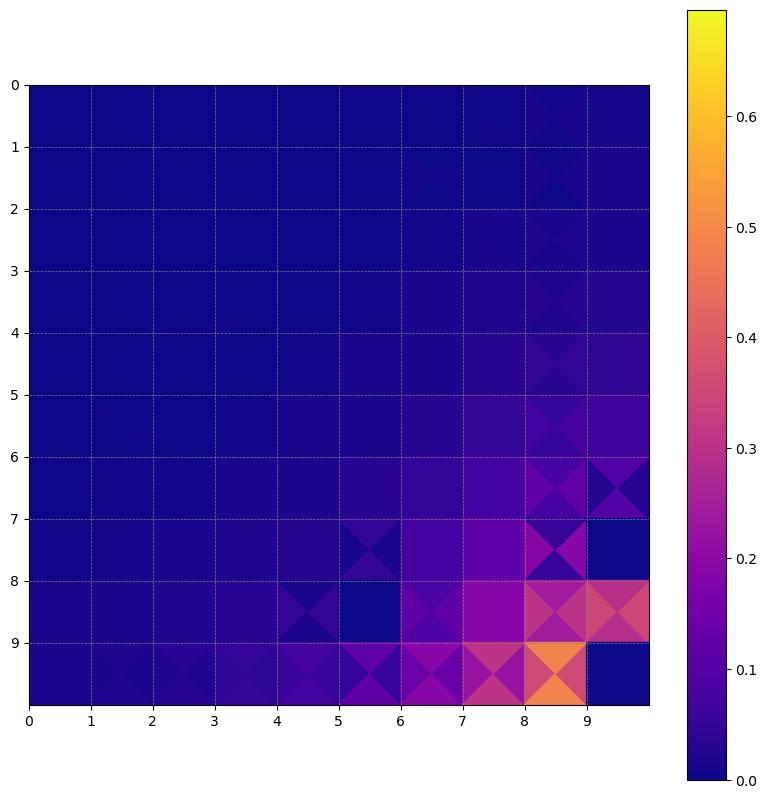

In [ ]:
from utils import ValueMapData

data = ValueMapData("./data/p0")

x = data[0]

visualize_tensor(x)

In [ ]:
x = data[0].float()
t = torch.tensor([0])

score = base(x[None], t)
print(torch.sum(score ** 2))

noise = torch.randn(1, 4, 10, 10)
score = base(noise, t)
print(torch.sum(score ** 2))


tensor(-9.7036, grad_fn=<SumBackward0>)
tensor(-14.2510, grad_fn=<SumBackward0>)
tensor(-14.0110, grad_fn=<SumBackward0>)


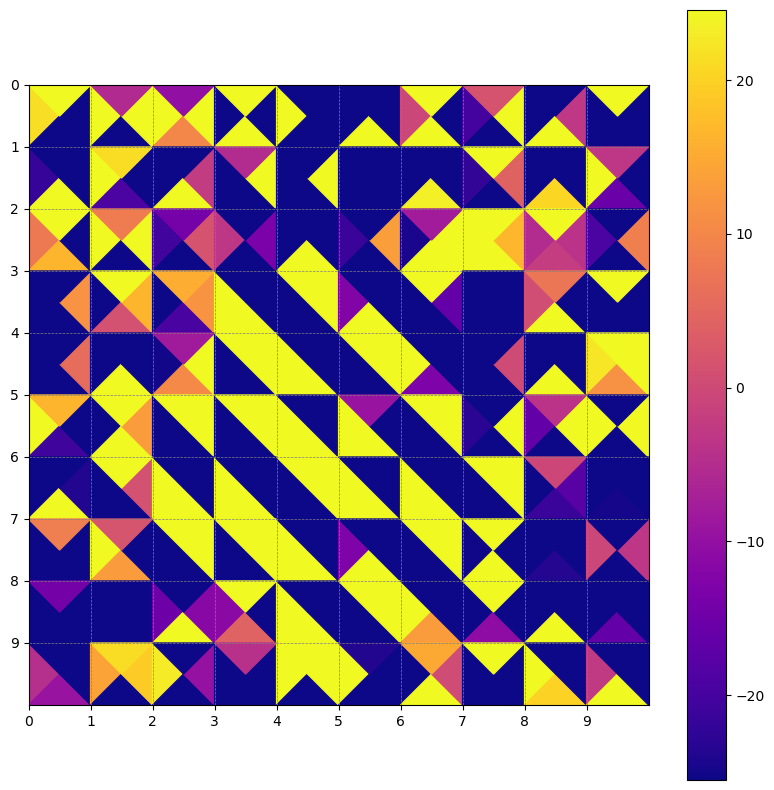

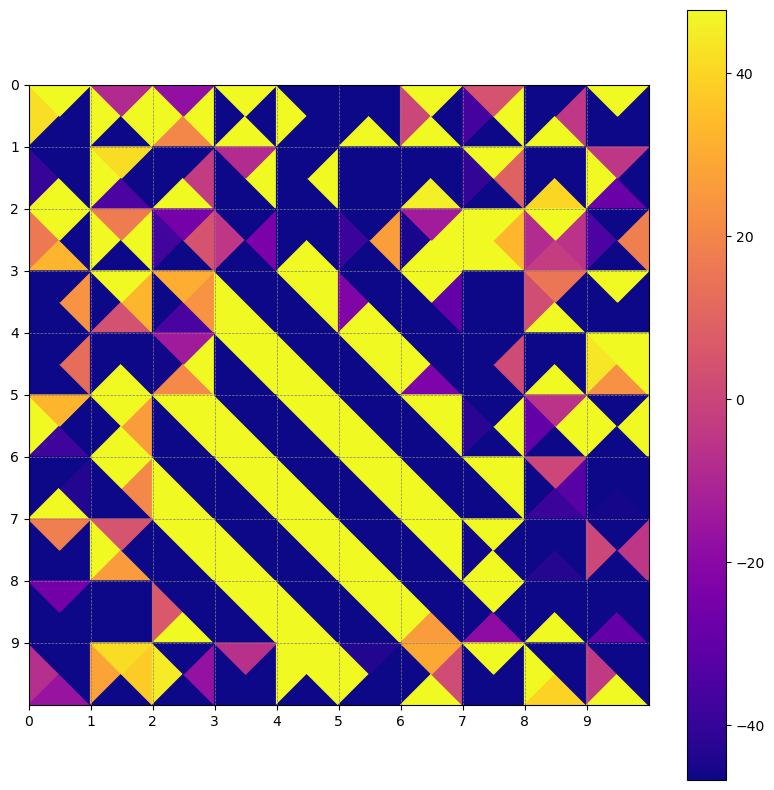

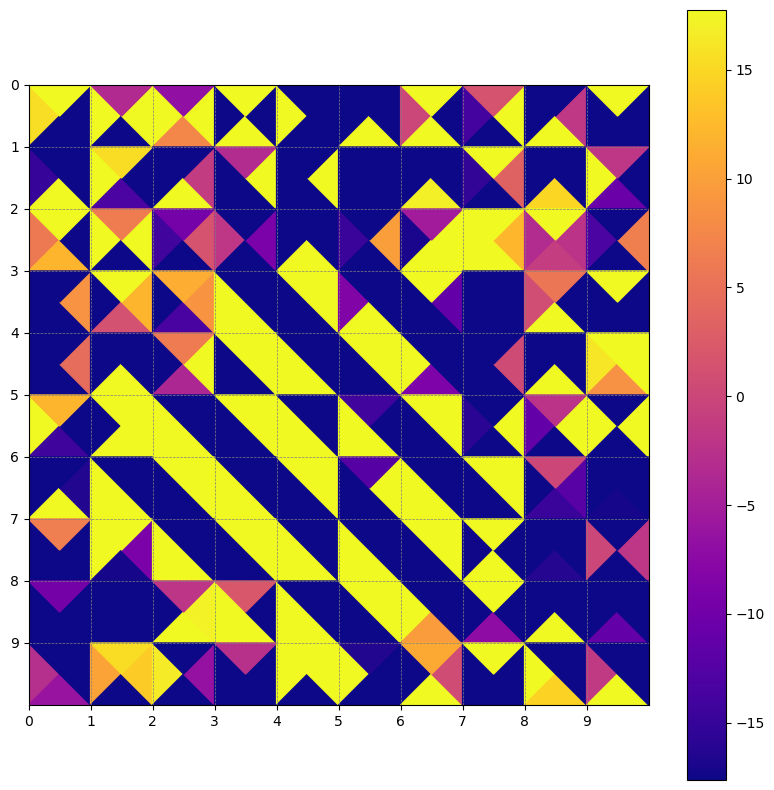

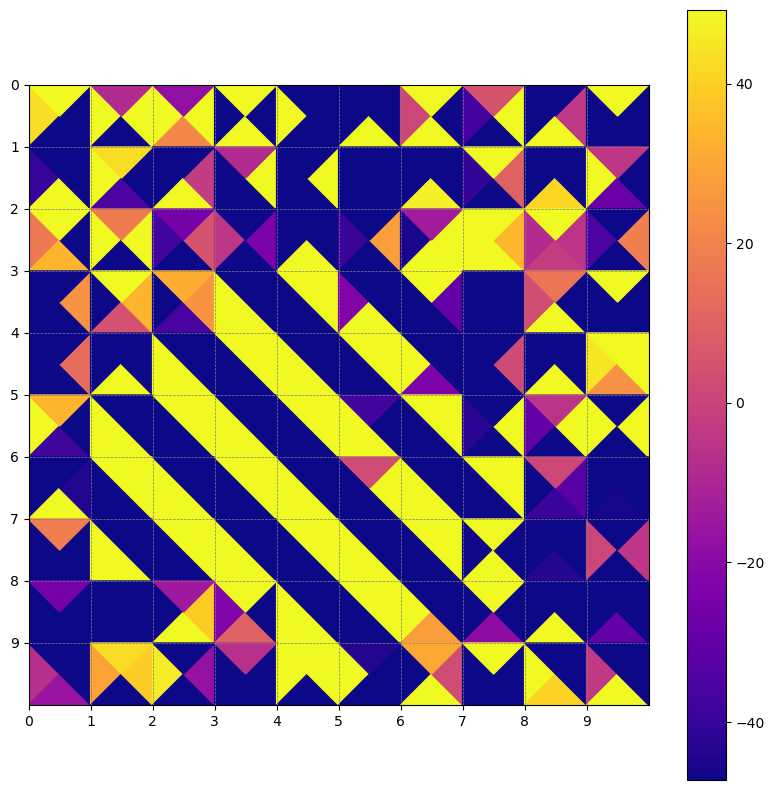

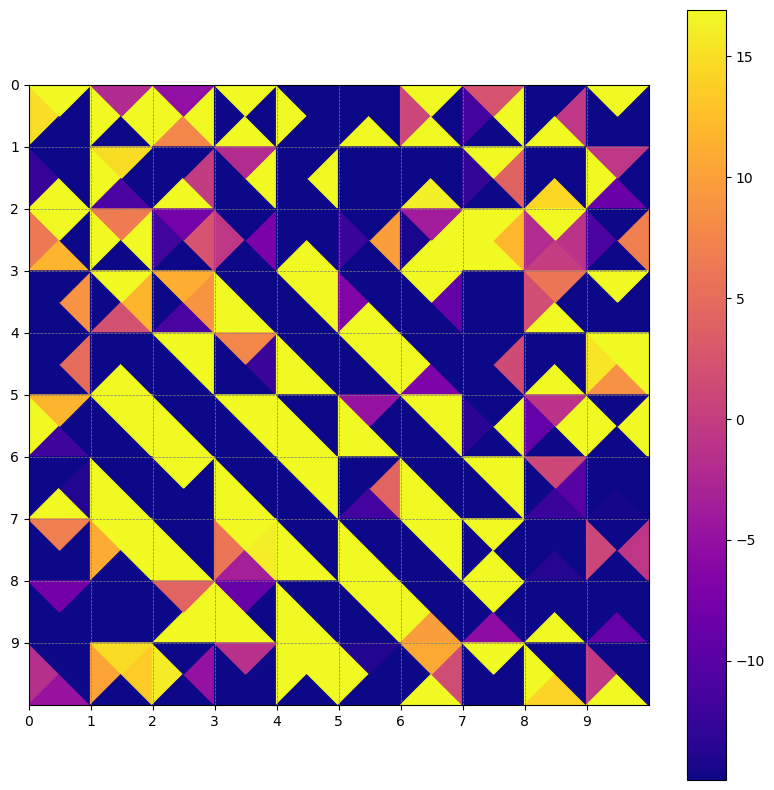

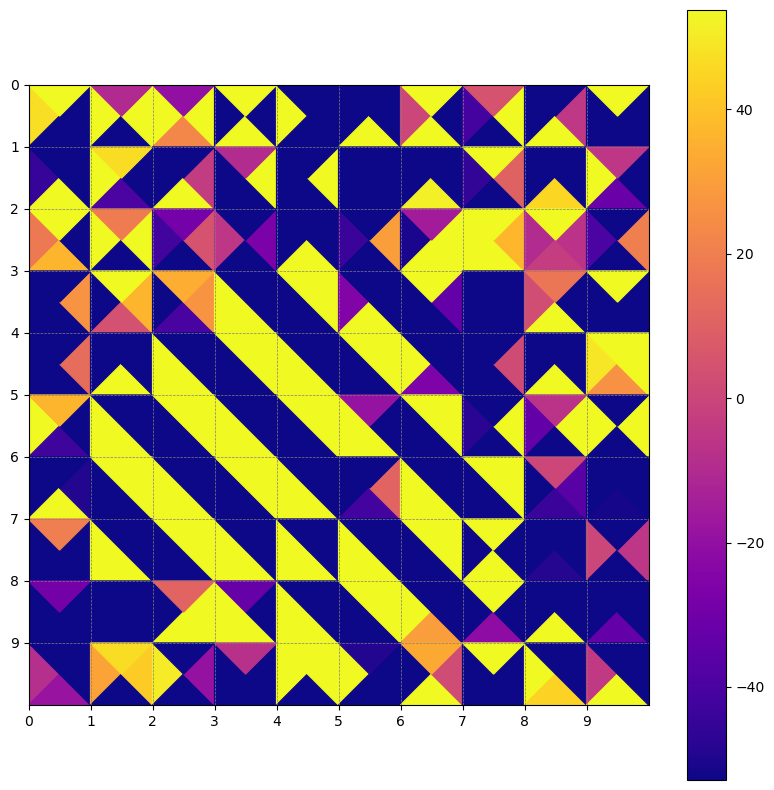

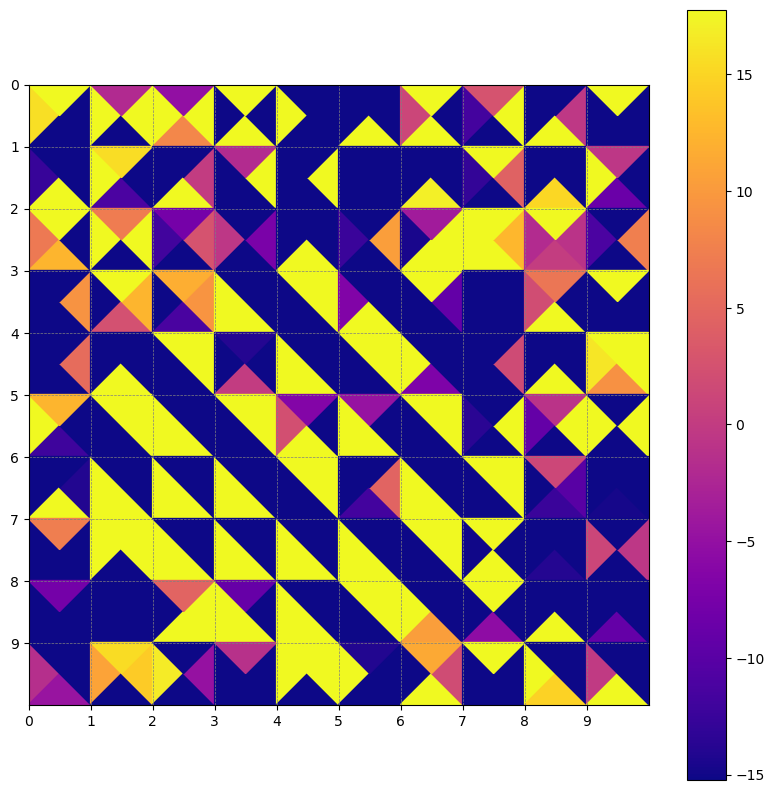

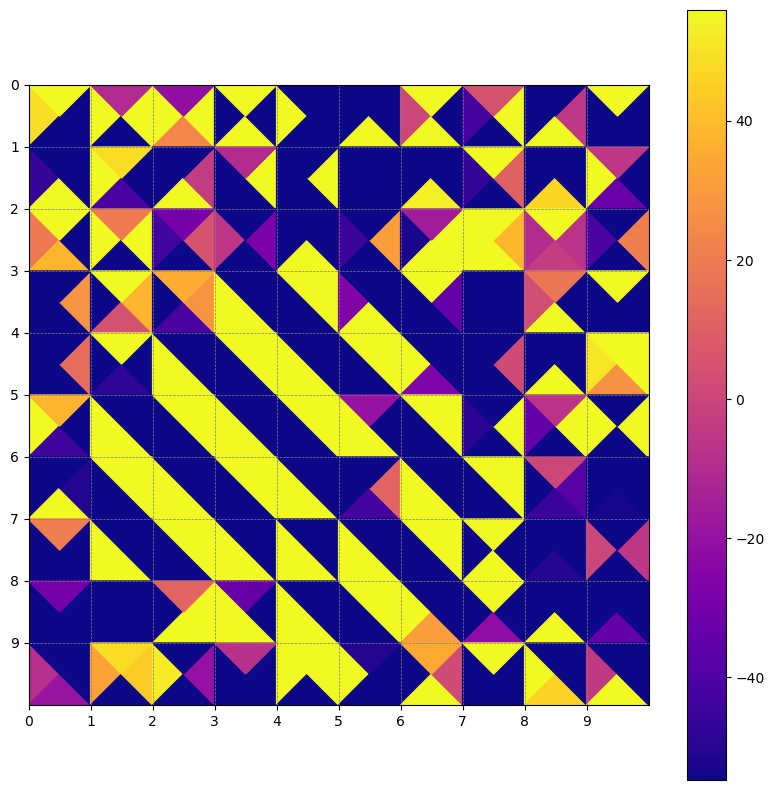

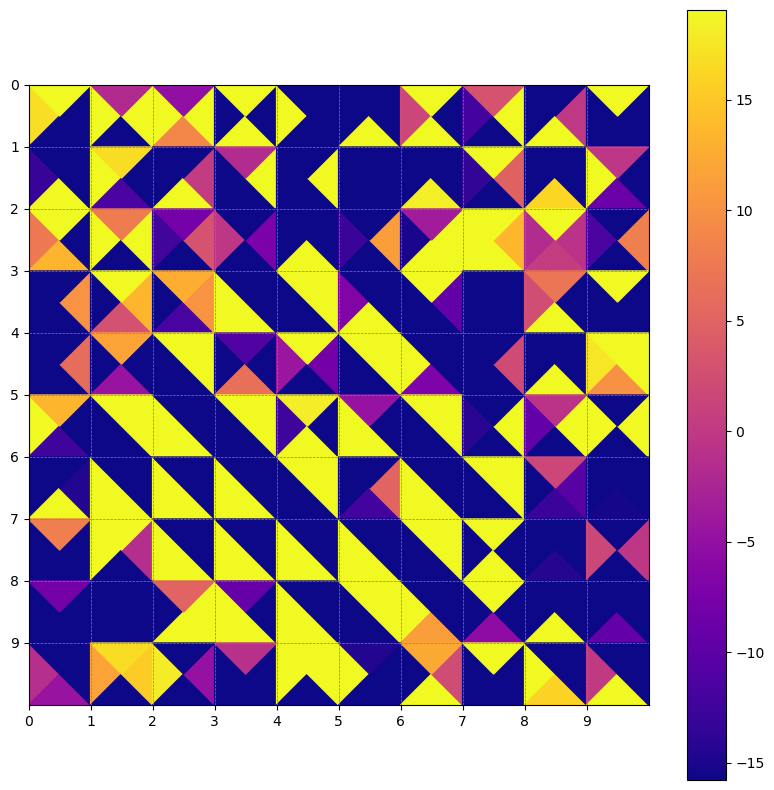

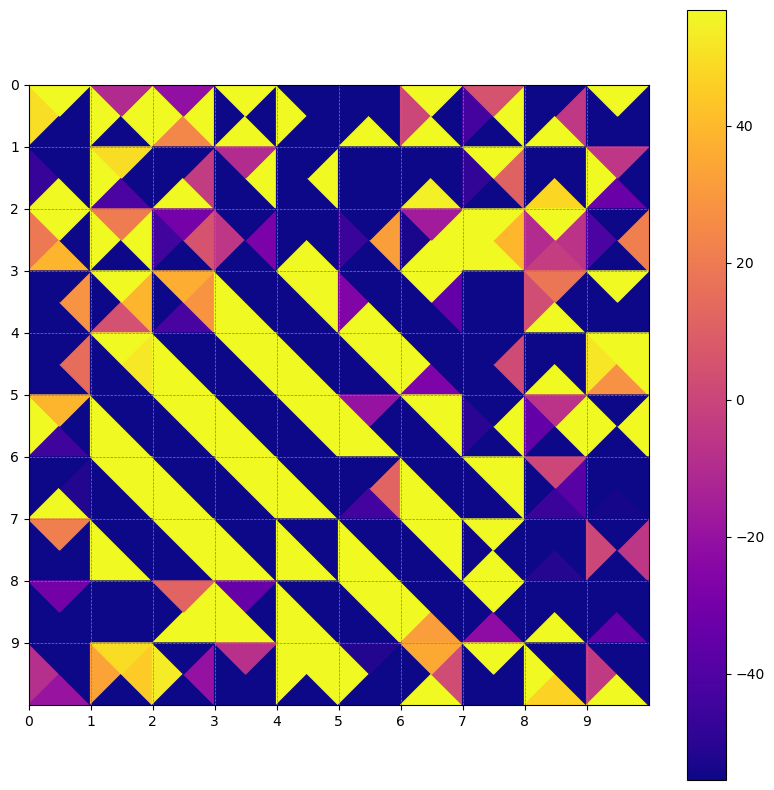

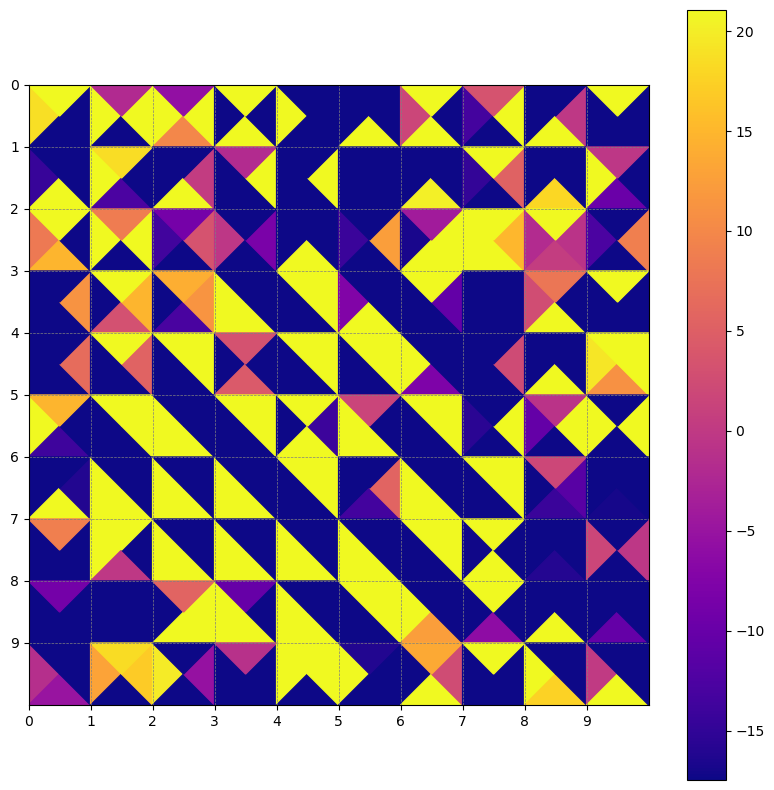

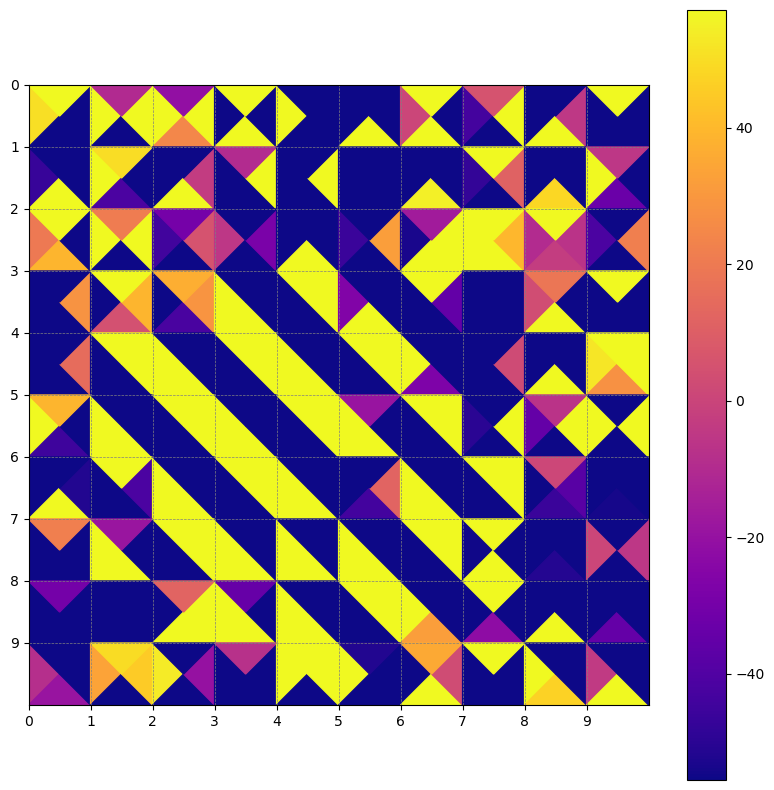

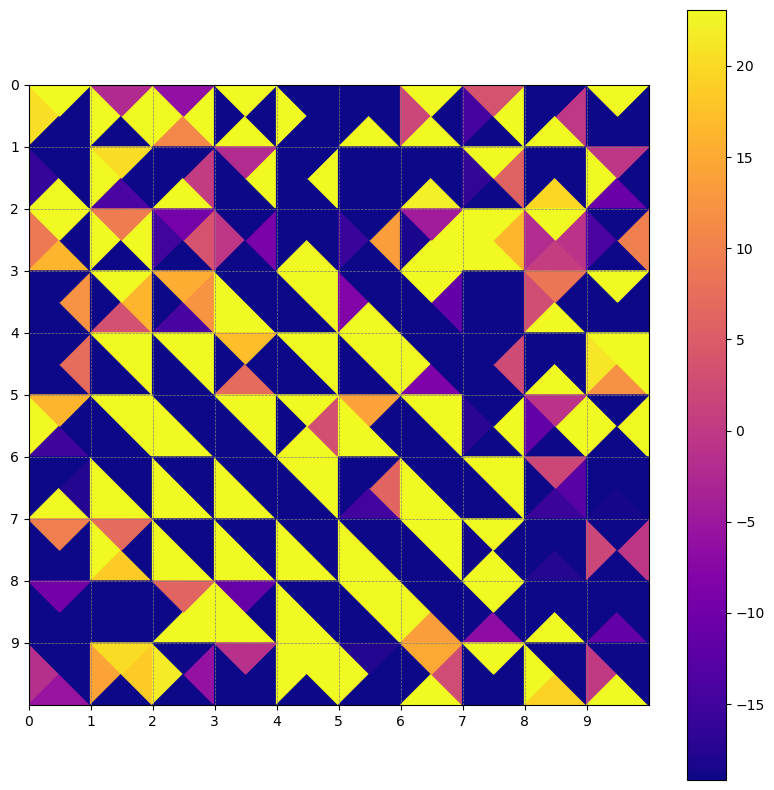

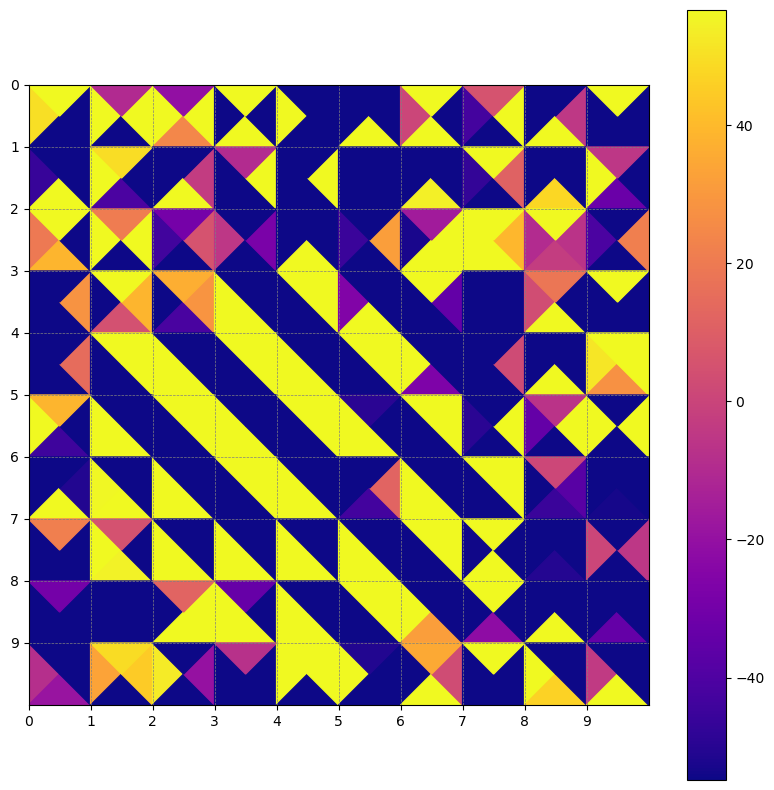

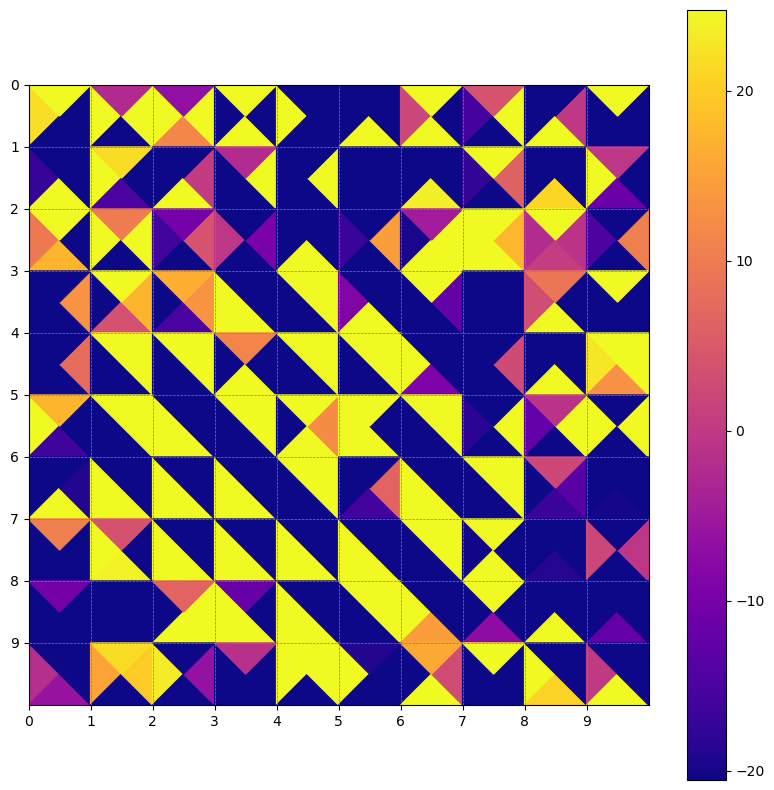

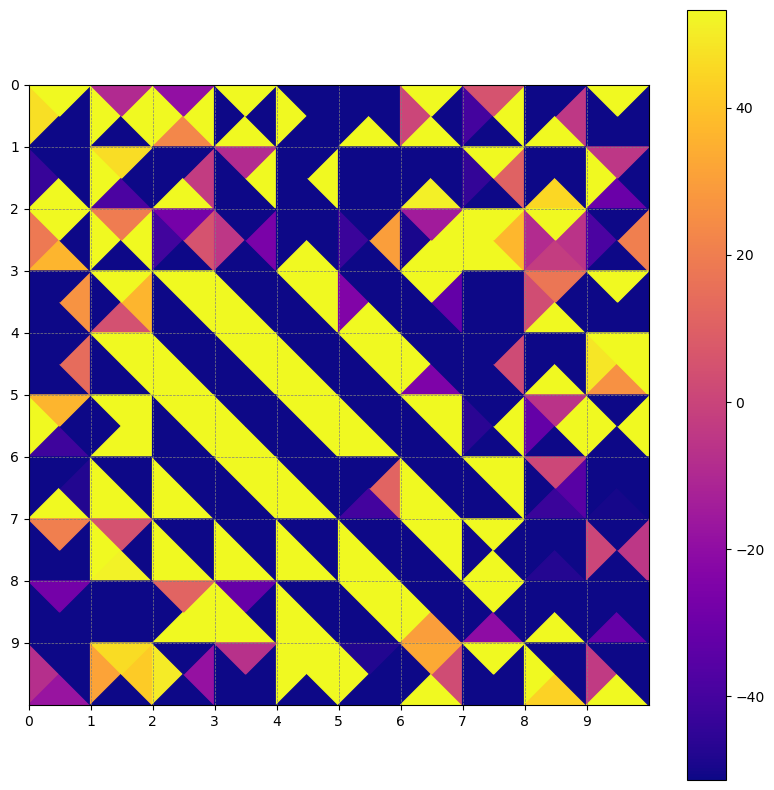

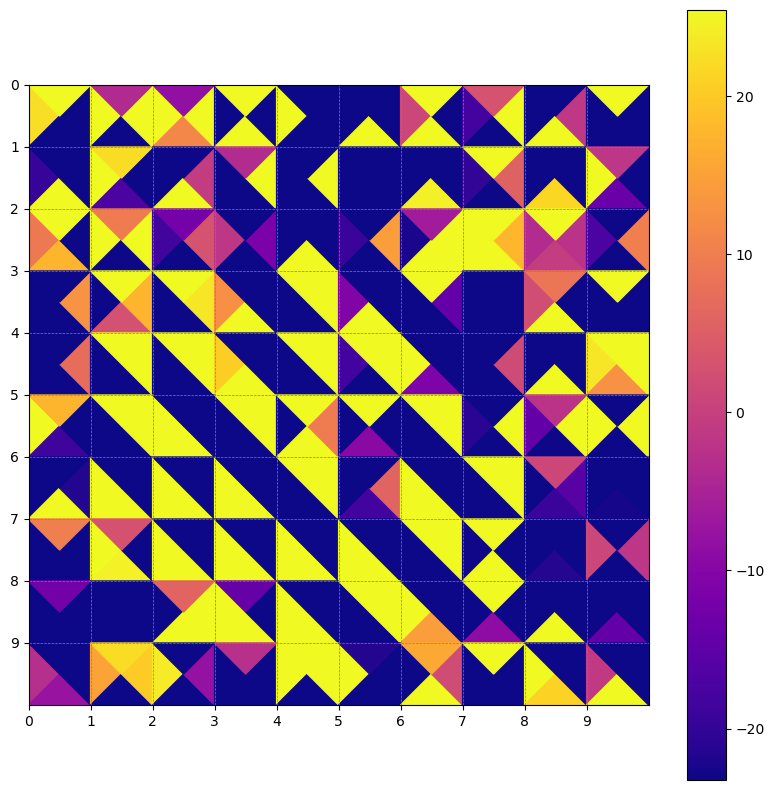

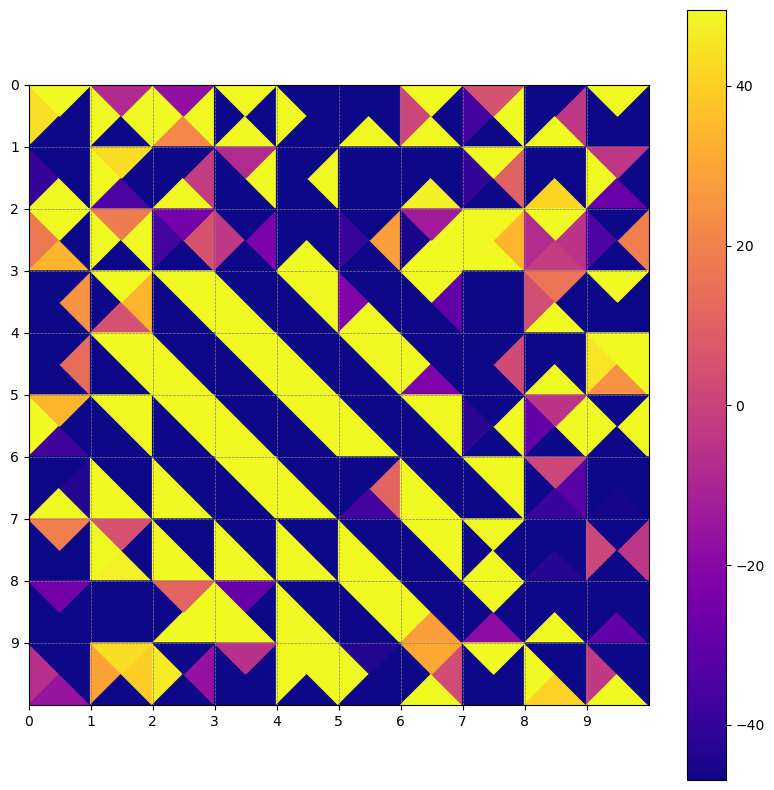

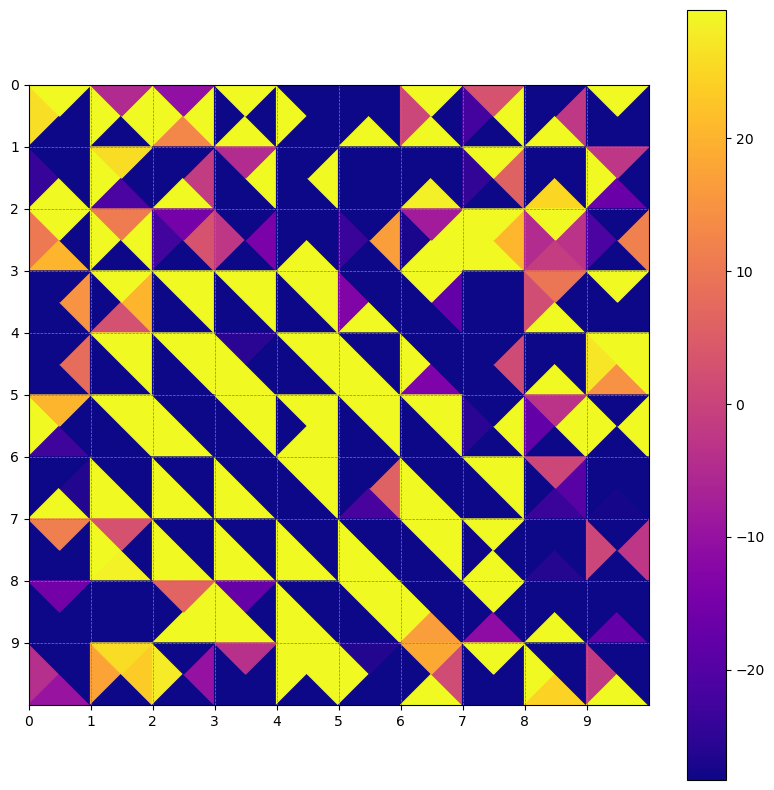

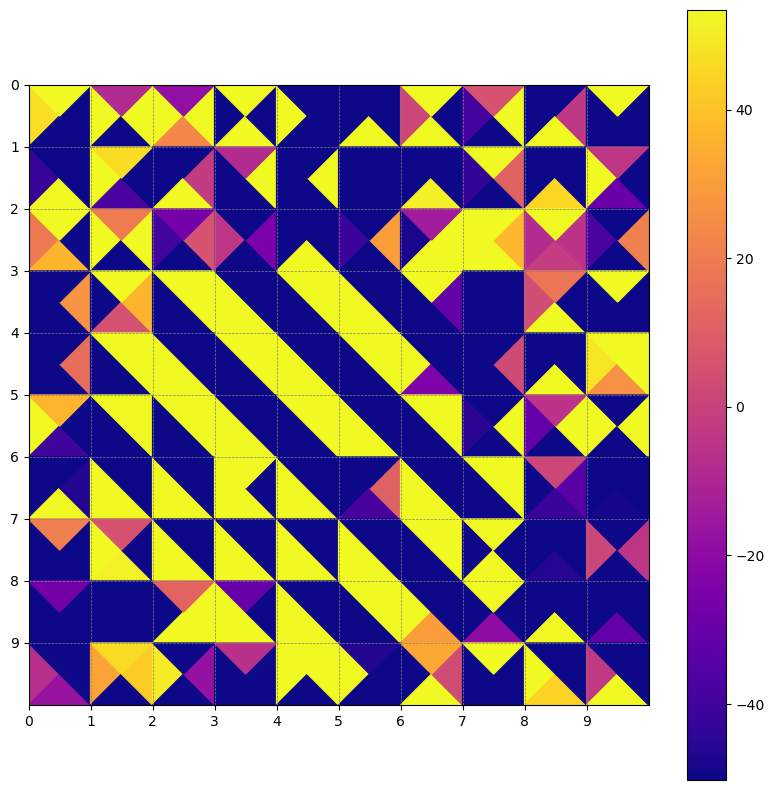

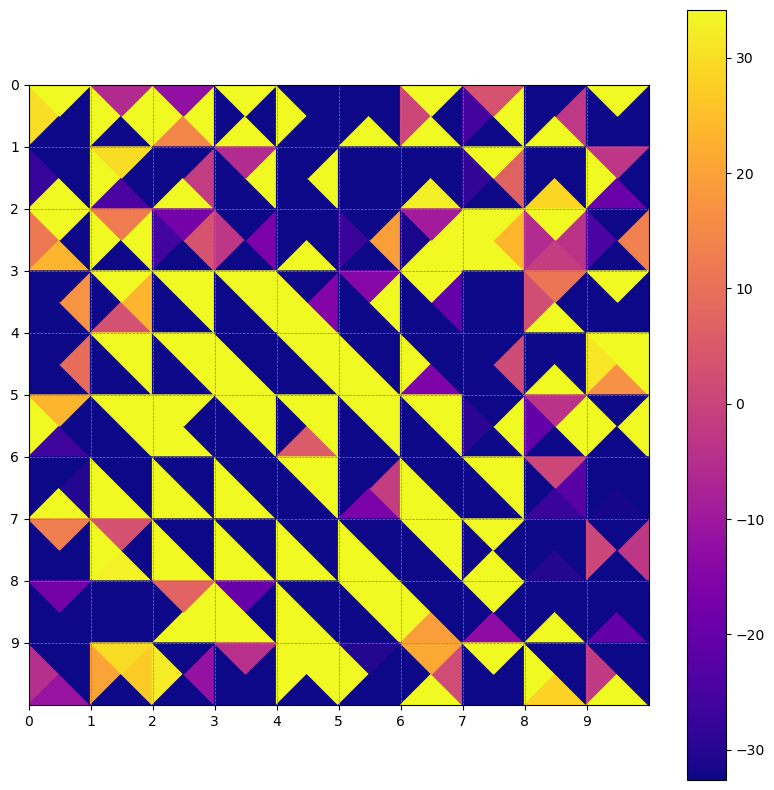

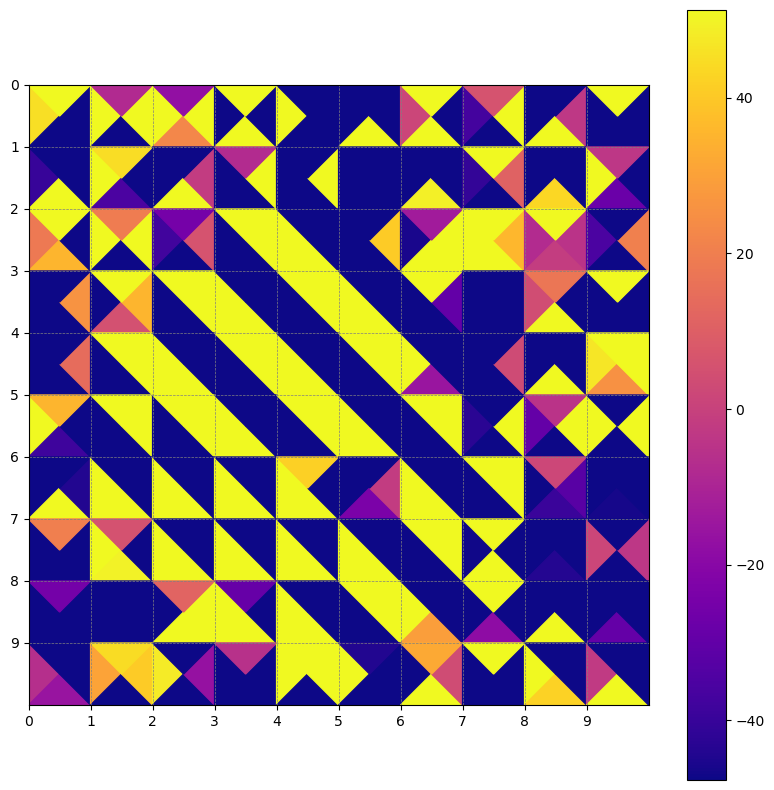

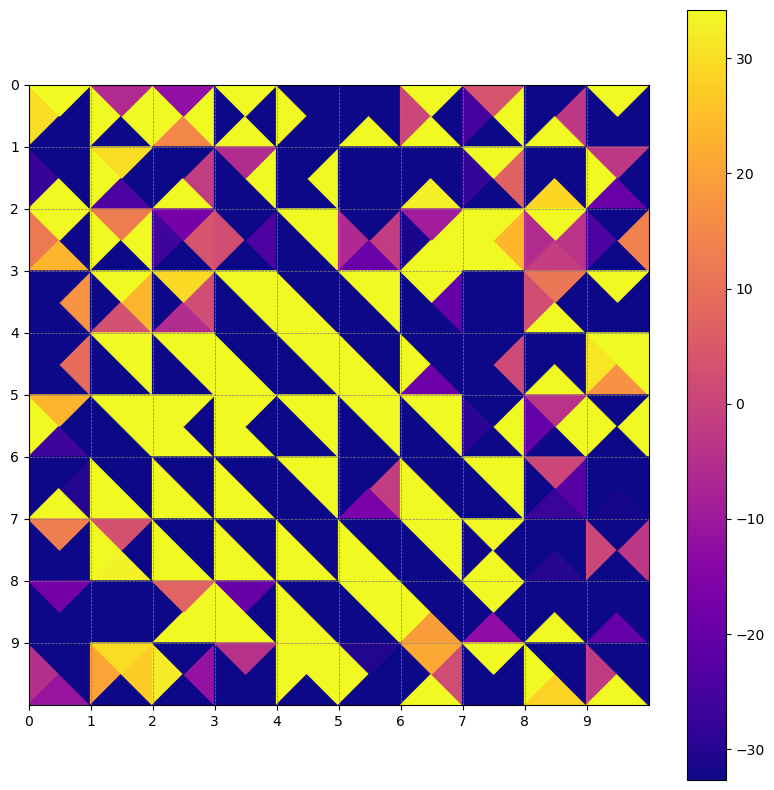

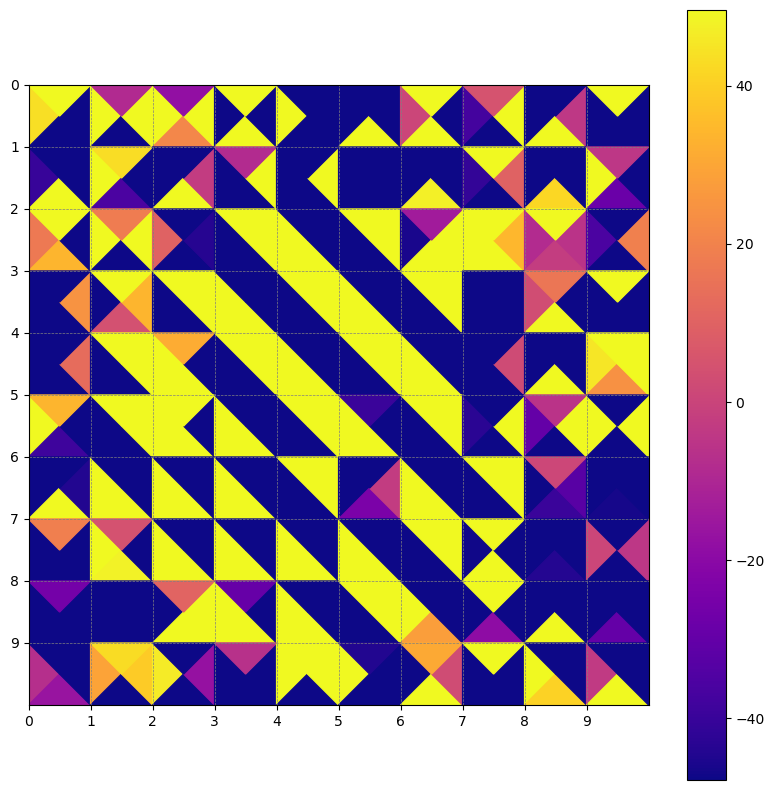

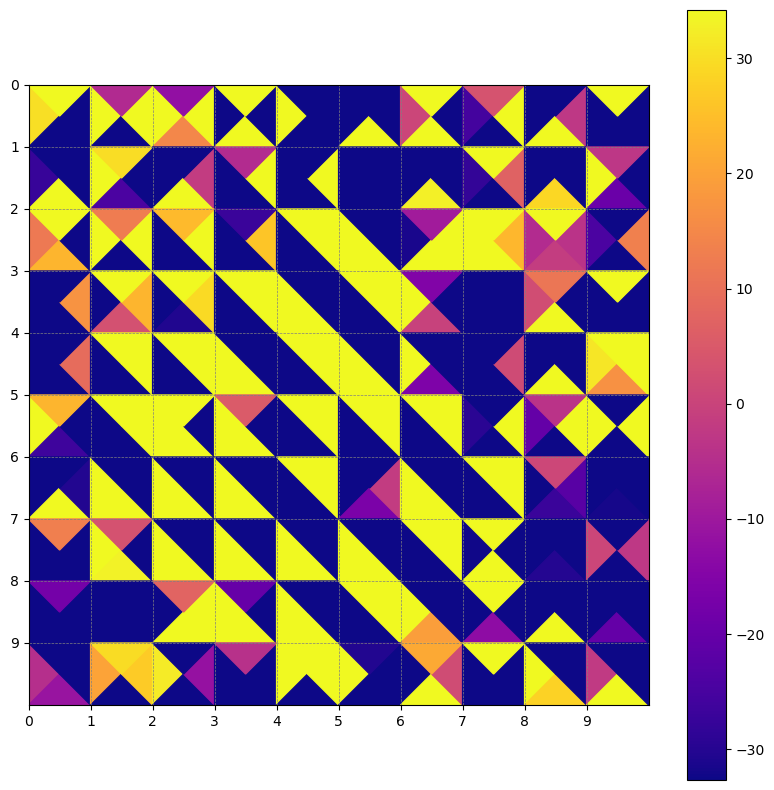

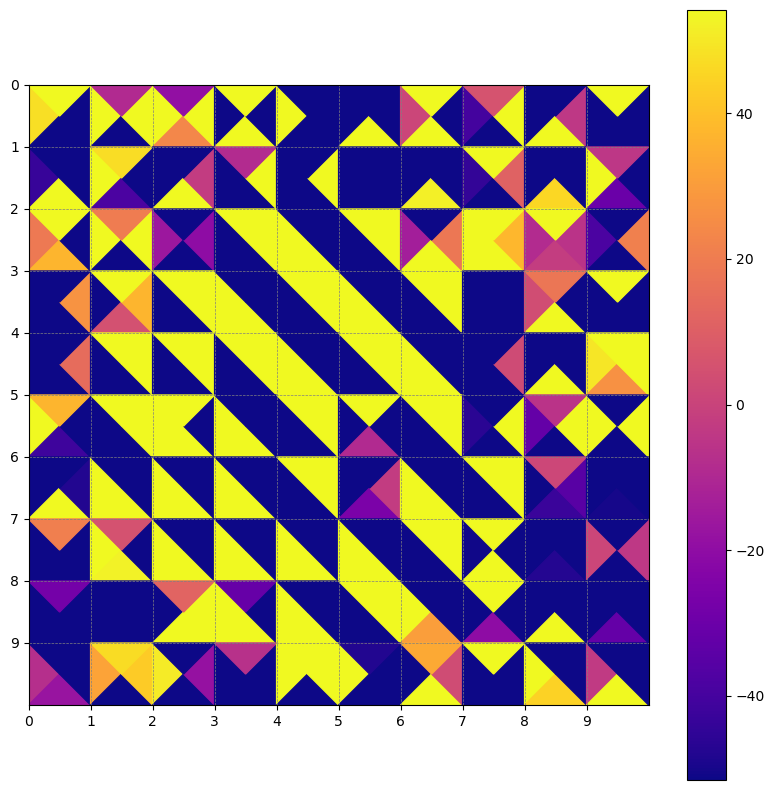

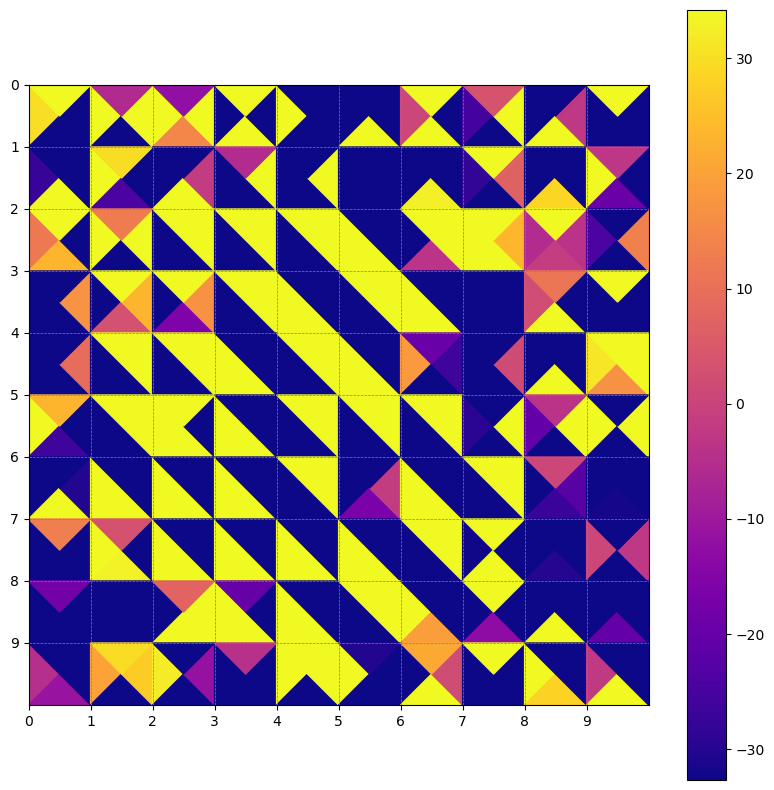

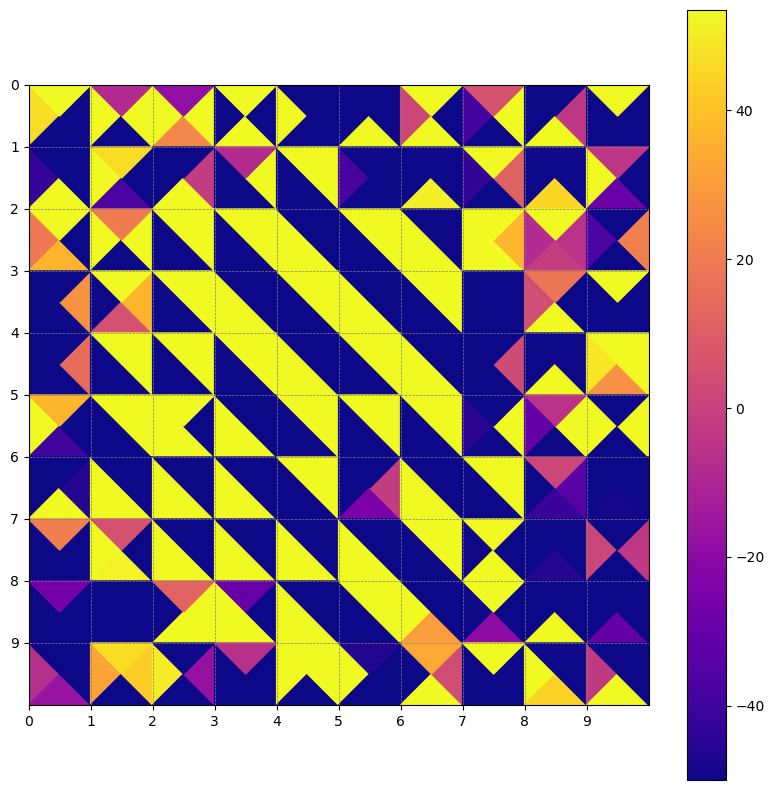

KeyboardInterrupt: 

In [172]:
from time import sleep
for _ in range(1000):
    score = base(noise, t)
    noise = noise - .20 * score 
    visualize_tensor(noise)
    sleep(1)
